In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgba
import plotly.express as px
import plotly.graph_objects as go

# Data Collection
### Loading Dataset

In [4]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## General characteristics of the data

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
data.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## Handling missing values:
 * Replacing null country values with the most frequent value.
 * Filling null values with '0' for 'children' column, as most of the bookings are with '0' number of children.

In [8]:
mode_country = data['country'].mode()[0]
data['country'].fillna(mode_country, inplace=True)

<ipython-input-8-d8da41e8cba3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna(mode_country, inplace=True)


In [9]:
data['children'].value_counts()

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
10.0,1


In [10]:
data['children'] = data['children'].fillna(0)

Dropping irrelevant columns.

Most of the rows for this attribute are NULL, so dropping it.

In [11]:
data=data.drop(columns=['company'])
data.shape

(119390, 31)

## Deleting duplicates:

Filling the remaining null values with '0' and deleting duplicate rows, if

In [12]:
data.fillna(0,inplace=True)
data.drop_duplicates()
data.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## Updating to appropriate datatypes:

Changing the data type from float to int for below columns. As,
*   'children' column provides number of children per booking.
*   'agent' refers to the agent ID of the travel agency that made the booking.

In [13]:
data['children'] = data['children'].astype(int)
data['agent'] = data['agent'].astype(int)
data.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


## Dropping Outlier rows:

adr:  (Average Daily Rate) reflects the average daily price a guest pays for a room. In this dataset, there's a minimum value of -6.38, which isn’t realistic and likely indicates an error. Additionally, there's an unusually high value of 5400, which stands out as an outlier when compared to the rest of the data. Therefore, we'll remove these rows to ensure more accurate analysis.


In [14]:
data['adr'].describe()

,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


In [15]:
data = data[(data['adr'] >= 0) & (data['adr'] <= 1000)]
data.shape

(119388, 31)

Children and babies: The maximum values for both categories, ranging from 9 to 10, seem unusually high for a single reservation, indicating potential outliers. Also, any booking showing babies but no adults isn't logical and likely represents an error.

In [16]:
data['babies'].value_counts()

,count
babies,
0,118471
1,900
2,15
10,1
9,1


In [17]:
data['children'].value_counts()

,count
children,
0,110798
1,4861
2,3652
3,76
10,1


In [18]:
filter1 = (data['children'] == 10) | (data['babies'].isin([9, 10])) | ((data['adults'] == 0) & (data['babies'] > 0))
data.drop(data[filter1].index, inplace=True)
data.shape

<ipython-input-18-8b90f219dc82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filter1].index, inplace=True)


(119382, 31)

## Removing Inconsistent Rows:

When the number of adults, babies, and children is zero, it suggests that there are no guests associated with the booking, which is invalid.  So, dropping those rows from the data.

In [19]:
guest_filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)

data.drop(data[guest_filter].index, inplace=True)
data.shape

<ipython-input-19-84c4e16dc672>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[guest_filter].index, inplace=True)


(119202, 31)

## Setting proper precesion for 'adr'

In [20]:
data['adr'] = data['adr'].round(2)

<ipython-input-20-9c6e265b16b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adr'] = data['adr'].round(2)


## Creating a new attribute to store the number of the month to utilize it furture for analysis.

In [21]:
#label encoding the ordinal variable
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['arrival_date_month_number'] = data['arrival_date_month'].apply(lambda x: months.index(x) + 1)
data['arrival_date_month_number'].dtype

dtype('int64')

In [22]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_number
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


## Checking for data imbalance

<ipython-input-23-3d13c881755d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])


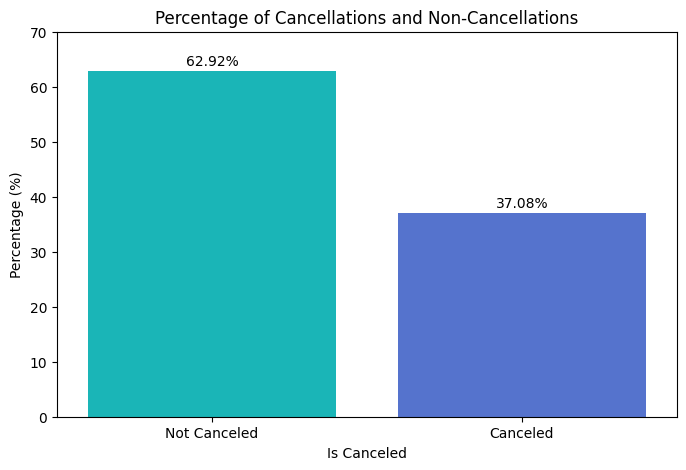

In [23]:
# Calculating the percentage of each class
percentage = data['is_canceled'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

The bar plot shows the proportion of canceled and non-canceled bookings in the dataset. About 37.08% of the bookings were canceled, while 62.92% were not. This suggests some imbalance in the target variable, but it's not extreme. Generally, a dataset is considered highly imbalanced when one category makes up 80-90% of the data. In this case, the canceled bookings (the smaller group) are still fairly well-represented, so we may not need to use resampling techniques like oversampling or undersampling to balance the classes.

## Creating a new attribute 'arrival_date' for further analysis.

In [24]:
data['arrival_date'] = data['arrival_date_year'].map(str) + '-' + data['arrival_date_month_number'].map(str) + '-' \
                       + data['arrival_date_day_of_month'].map(str)

In [25]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_number,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-7-1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-7-1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-7-1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-7-1


In [26]:
print(data['arrival_date'])

0          2015-7-1
1          2015-7-1
2          2015-7-1
3          2015-7-1
4          2015-7-1
            ...    
119385    2017-8-30
119386    2017-8-31
119387    2017-8-31
119388    2017-8-31
119389    2017-8-29
Name: arrival_date, Length: 119202, dtype: object


In [27]:
print(data['reservation_status_date'])

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119202, dtype: object


## Updating the data type for 'arrival_date' column

In [28]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119202 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119202 non-null  object        
 1   is_canceled                     119202 non-null  int64         
 2   lead_time                       119202 non-null  int64         
 3   arrival_date_year               119202 non-null  int64         
 4   arrival_date_month              119202 non-null  object        
 5   arrival_date_week_number        119202 non-null  int64         
 6   arrival_date_day_of_month       119202 non-null  int64         
 7   stays_in_weekend_nights         119202 non-null  int64         
 8   stays_in_week_nights            119202 non-null  int64         
 9   adults                          119202 non-null  int64         
 10  children                        119202 non-null  int64       

# Feature Engineering

### added cleaning step

In [29]:
#Remove outliers in 'lead_time' using IQR
Q1 = data['lead_time'].quantile(0.25)
Q3 = data['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['lead_time'] >= lower_bound) & (data['lead_time'] <= upper_bound)]
data.shape




(116221, 33)

In [30]:
# 1. Creating new features
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['has_children'] = data.apply(lambda x: 1 if (x['children'] > 0 or x['babies'] > 0) else 0, axis=1)
data['long_wait'] = data['days_in_waiting_list'].apply(lambda x: 1 if x > 0 else 0)

# 2. Binning lead time
bins = [0, 30, 90, 180, data['lead_time'].max()]
labels = ['Very Short', 'Short', 'Medium', 'Long']
data['lead_time_category'] = pd.cut(data['lead_time'], bins=bins, labels=labels, include_lowest=True)


<ipython-input-30-3d3292de3d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


In [31]:
#log transformation:

data['adr'] = np.log1p(data['adr'])
data['lead_time'] = np.log1p(data['lead_time'])

# **Exploratory Data Analysis**

### Booking Trends

In [32]:
# Comparing the number of bookings for Resort Hotels vs City Hotels using a bar chart.

resort_len= len(data[data['hotel']=='Resort Hotel'])
city_len=len(data[data['hotel']=='City Hotel'])
hotel_types = ['Resort Hotel', 'City Hotel']
lengths = [resort_len, city_len]

fig = go.Figure(data=[go.Bar(
    x=hotel_types,
    y=lengths,
    marker_color=['#FFA07A', '#20B2AA'],
    text=lengths,
)])

fig.update_layout(
    title='Number of booking for Each Hotel Type',
    xaxis_title='Type of Hotel',
    yaxis_title='Number of bookings',
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.show()


### Observations:
- The chart illustrates a significantly higher number of bookings for **City Hotels** compared to **Resort Hotels**, with a marked difference in volume.
- This disparity indicates that **City Hotels** dominate in terms of customer demand, as reflected by the larger proportion of bookings.

### Interpretations:
- **City Hotels** likely attract a more frequent traveler demographic, such as business or short-term visitors, contributing to their consistently higher booking rates.
- **Resort Hotels**, with fewer overall bookings, may rely on seasonal peaks or longer vacation stays, potentially pointing to a more specialized or time-sensitive customer base. This suggests opportunities for targeted marketing during off-peak periods to balance the booking trends.

In [33]:
# Number of bookings by country
country_freq = data['country'].value_counts().to_frame()
country_freq.columns = ['count']
fig = px.choropleth(country_freq, color='count',
                    locations=country_freq.index,
                    hover_name=country_freq.index,
                    color_continuous_scale=px.colors.sequential.Teal)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Number of bookings by Country',
                  title_x=0.5, title_font=dict(size=22),width=1000)
fig.show()

### Observations:
- The map highlights that most bookings come from European countries, with Portugal being the largest contributor, followed by other nearby regions.
- Non-European countries show much lower booking volumes, with minimal representation from Africa and South America.

### Interpretation:
- The high number of bookings from Portugal suggests that the hotel primarily attracts domestic travelers or those from nearby European countries. This trend could be due to proximity, cultural ties, or regional tourism habits.
- The low booking counts in other continents, particularly in Africa and South America, suggest that the hotel’s customer base may have less global reach and is more regionally concentrated.

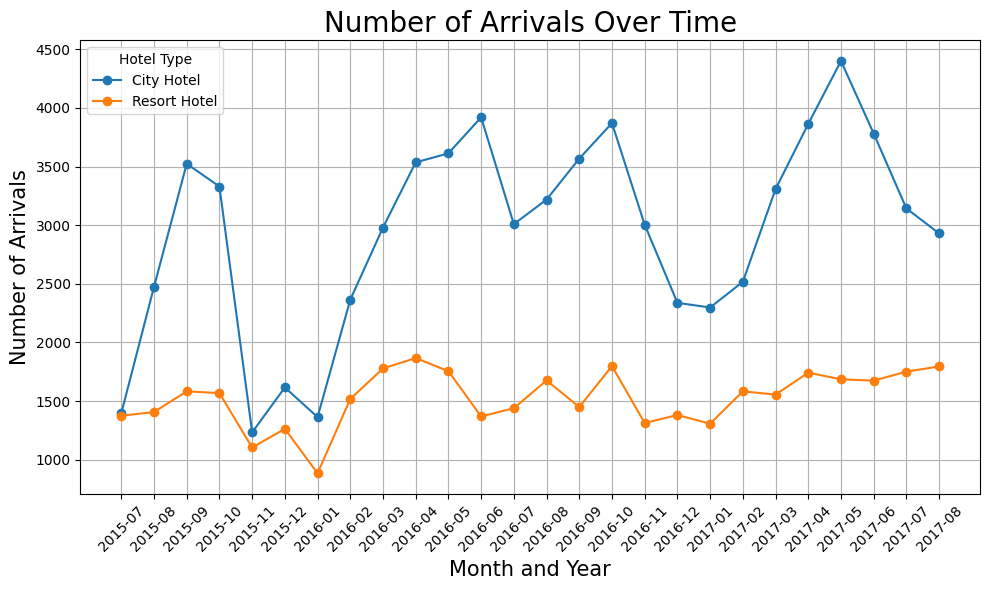

In [34]:
# Number of booking over the time
data['arrival_year_month'] = data['arrival_date'].dt.to_period('M')

# Group data by 'arrival_year_month' and 'hotel', counting the number of records for each month
monthly_arrivals = data.groupby(['arrival_year_month', 'hotel']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

for hotel_type in monthly_arrivals.columns:
    plt.plot(monthly_arrivals.index.astype(str), monthly_arrivals[hotel_type], marker='o', linestyle='-', label=hotel_type)

plt.xlabel('Month and Year', fontsize=15)
plt.ylabel('Number of Arrivals', fontsize=15)
plt.title('Number of Arrivals Over Time', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()


### Observations:
- The **City Hotel** shows significant fluctuations in the number of bookings/arrivals over time, with peaks in mid-2016 and mid-2017, surpassing 4000 bookings.
- The **Resort Hotel** exhibited relatively stable booking volumes, with arrivals consistently ranging between 1000 and 2000 throughout the observed period.

### Interpretations:
- The higher variability in **City Hotel** bookings may suggests that its demand was more influenced by short-term factors, such as event-driven or business-related stays, contributing to more dynamic booking trends.
- In contrast, the steadier bookings for **Resort Hotels** indicate a more predictable customer base, likely associated with planned vacations or extended stays, leading to a more consistent number of arrivals.

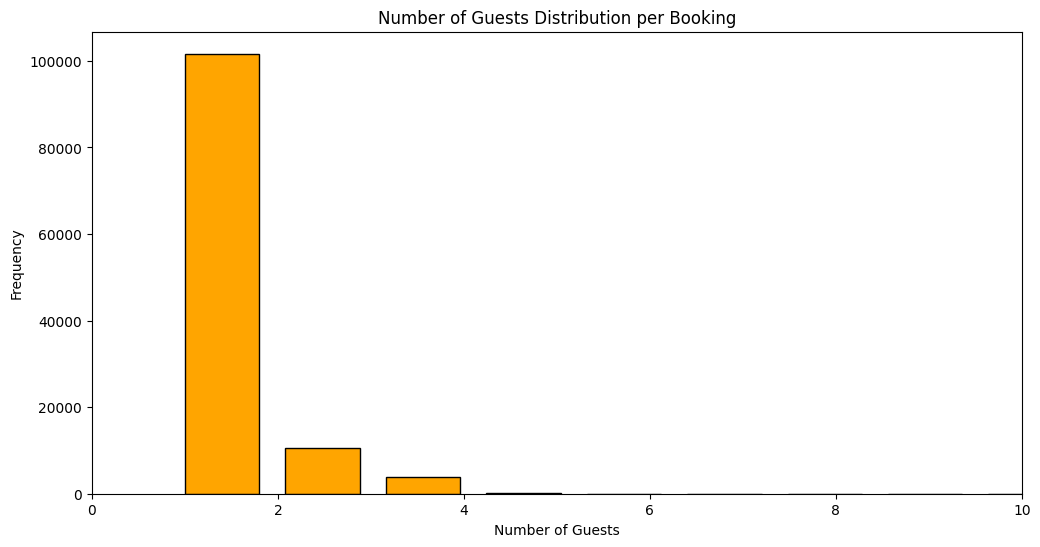

In [35]:
# Number of guests distribution (adults + children + babies) per booking
data['total_guests'] = data['adults'] + data['children'] + data['babies']

plt.figure(figsize=(12, 6))
plt.hist(data['total_guests'], bins=50, color='orange', edgecolor='black', width=0.8)  # Adjust width as needed
plt.title('Number of Guests Distribution per Booking')
plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()


**Observation**:  

*   The histogram shows that the vast majority of bookings are for 1 to 2 guests, with the distribution heavily skewed toward lower guest counts.
*   The total guest count rarely exceeds 10, and bookings with more than 10 guests are outliers.

**Interpretation**:

*   Most hotel bookings are for small groups or individuals, which is typical for both business and leisure travelers
*   The infrequent occurrence of large groups indicates that hotels, on average, cater to smaller groups of guests. The high frequency of small bookings suggests that individual travelers or couples make up a significant portion of the hotel's clientele. This pattern could affect resource planning, where hotels may focus more on accommodating single or double bookings rather than larger group bookings.

.

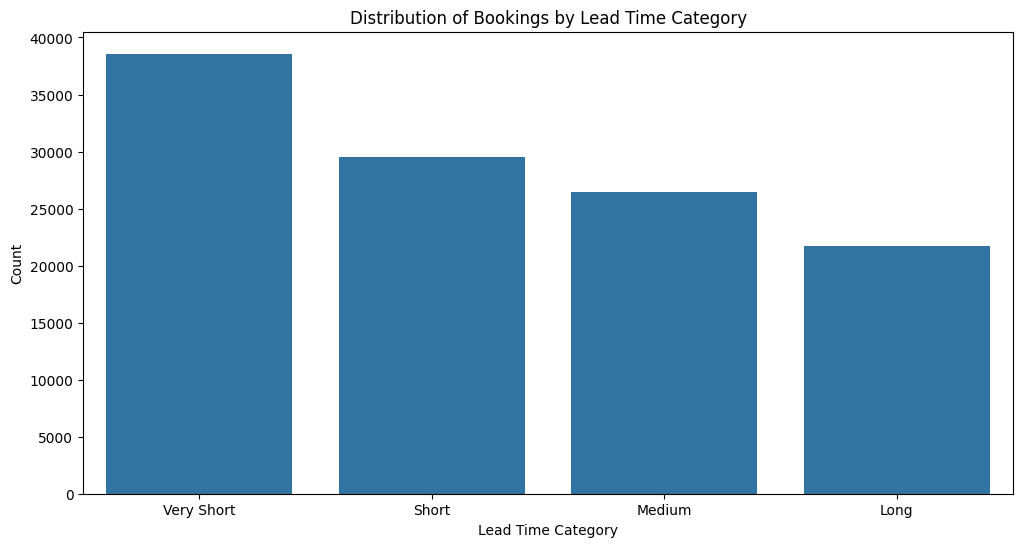

In [36]:
# This code generates a count plot of bookings categorized by lead time.

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='lead_time_category')
plt.title('Distribution of Bookings by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Count')
plt.show()


**Observation**:

*   The bar chart shows the distribution of bookings across different lead time categories.
*   The Very Short lead time category (0-30 days) has the highest number of bookings, followed by the Short and Medium categories.

**Interpretation**:

*   Most bookings are made within 0-90 days before the stay, suggesting that guests typically plan their trips on shorter notice.
*   Hotels may not need to heavily focus on very long-term booking strategies since the demand for such bookings is relatively low.




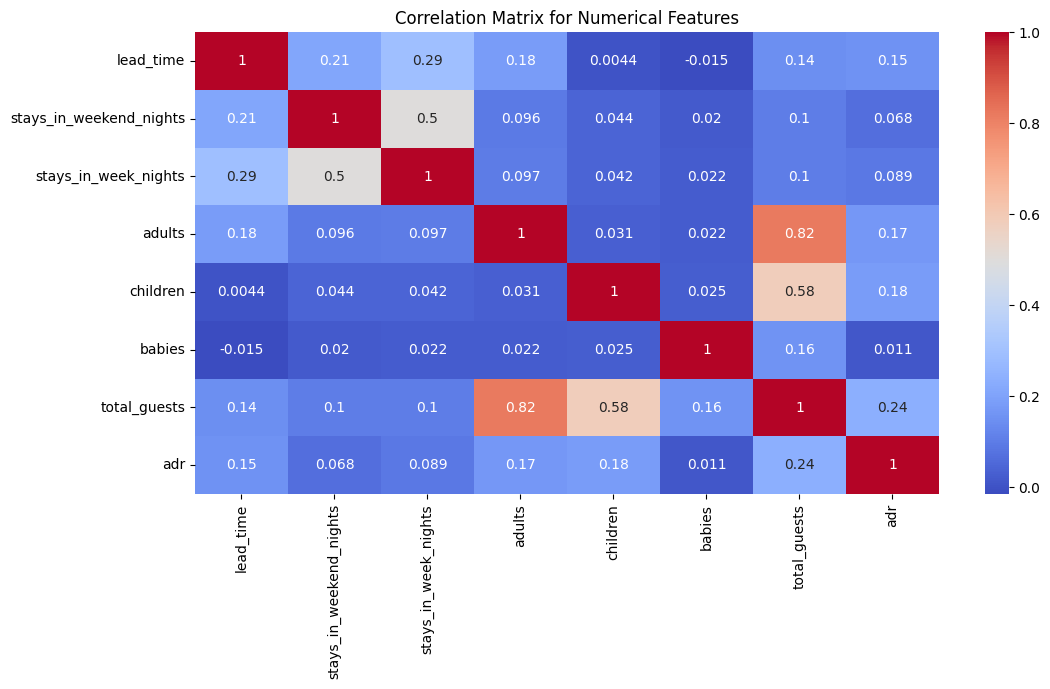

In [37]:
# Correlation Analysis: Numerical features
plt.figure(figsize=(12, 6))
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'total_guests', 'adr']
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

### Observations:
- **Total Guests** is highly correlated with the number of **adults** and **children**, but shows little correlation with the number of **babies**, indicating that most bookings include adults or older children.
- **Stays in Weekend Nights** and **Stays in Week Nights** are positively correlated, suggesting that many bookings span both weekend and weekday periods, potentially for longer stays.
- **Lead Time** has minimal correlation with **total guests**, showing that how far in advance a booking is made does not significantly affect the number of guests in a booking.

### Interpretations:
- The **number of guests** is primarily influenced by the presence of **adults** and **children**, which suggests that hotel rooms are more commonly designed for these groups rather than infants or babies.
- The correlation between weekend and weekday stays may indicate that customers tend to book for multiple days, spanning both weekends and weekdays, likely indicating longer vacations or stays.
- **ADR (Average Daily Rate)** is weakly correlated with the number of **total guests**, implying that larger group sizes do not strongly influence the price paid per day, and other factors may drive pricing decisions.

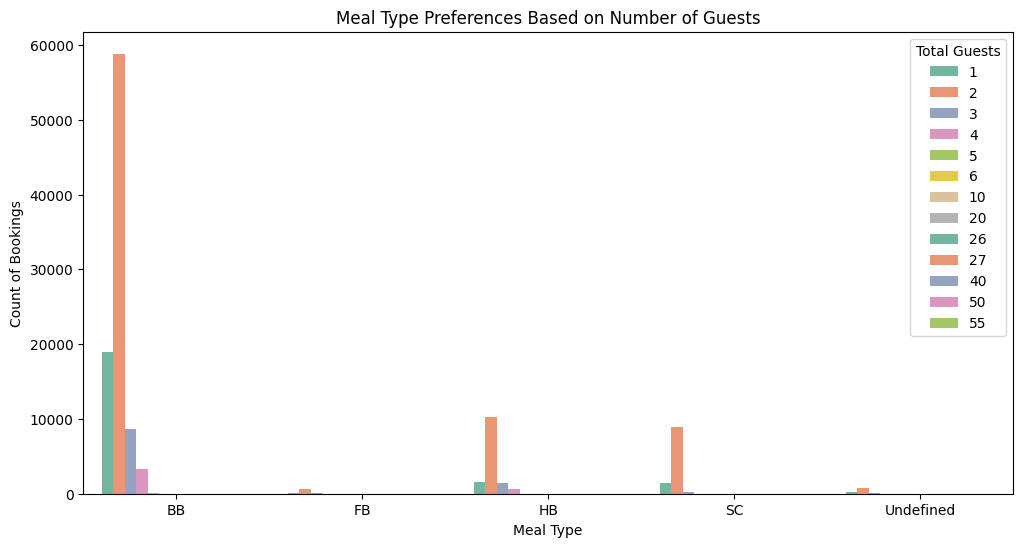

In [38]:
# Create a count plot for meals based on total guests
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='meal', hue='total_guests', palette='Set2')
plt.title('Meal Type Preferences Based on Number of Guests')
plt.xlabel('Meal Type')
plt.ylabel('Count of Bookings')
plt.legend(title='Total Guests')
plt.show()


### Observations:
- The vast majority of guests selected the **BB (Bed & Breakfast)** meal type, with significantly fewer choosing the other options such as **FB (Full Board)**, **HB (Half Board)**, and **SC (Self Catering)**.
- The number of guests does not appear to have a significant impact on the meal type chosen, as the distribution of total guests across meal types remains consistent.

### Interpretation:
- The **BB (Bed & Breakfast)** meal option is the most popular choice among guests, regardless of the number of people in the booking. This suggests that guests prioritize breakfast as part of their stay, but do not necessarily require additional meal services like full or half board.
- The consistency in guest numbers across meal types indicates that meal preferences are likely driven by factors other than group size, such as personal preferences or package offerings by the hotel.

### Cancellation Trends

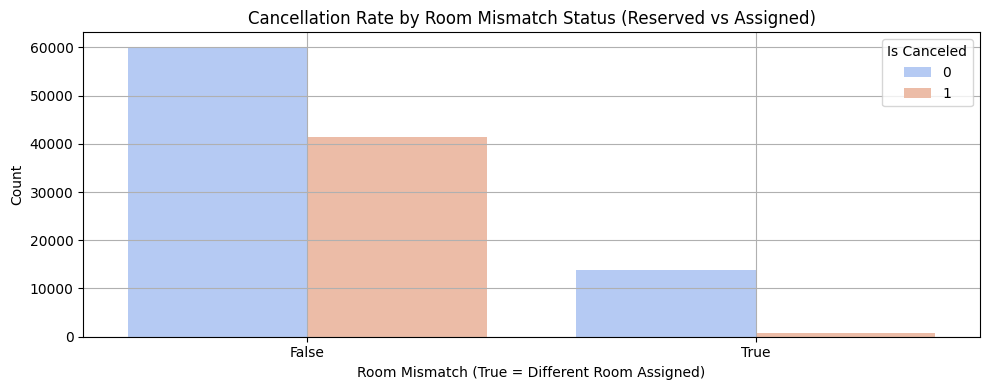

In [39]:
plt.figure(figsize=(10, 4))

# Create a new column to indicate whether the assigned room is different from the reserved room
data['room_mismatch'] = data['reserved_room_type'] != data['assigned_room_type']

# Plot the count of cancellations by room mismatch status
sns.countplot(data=data, x='room_mismatch', hue='is_canceled', palette='coolwarm')
plt.title('Cancellation Rate by Room Mismatch Status (Reserved vs Assigned)')
plt.xlabel('Room Mismatch (True = Different Room Assigned)')
plt.ylabel('Count')
plt.legend(title='Is Canceled', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


### Observations:
- The chart shows that when there is **no room mismatch** (False), a significant number of bookings were not canceled, but a substantial portion still resulted in cancellations.
- When there **is a room mismatch** (True), fewer bookings were made, and most of these were not canceled, with very few resulting in cancellations.

### Interpretation:
- The data suggests that **room mismatches** do not significantly increase cancellation rates. Even when rooms are assigned correctly, cancellations occur frequently, indicating that factors other than room mismatch, such as booking preferences or external circumstances, may drive the decision to cancel.

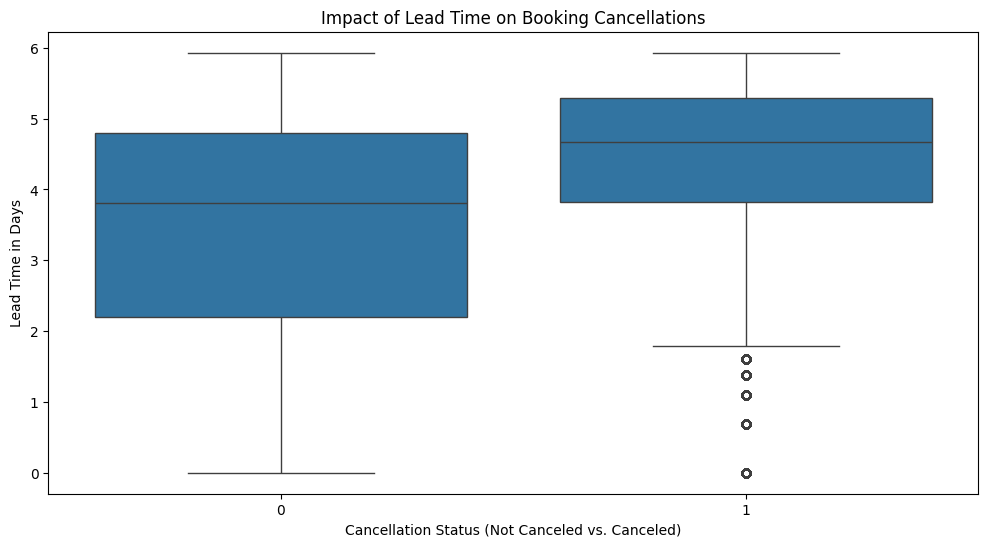

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Impact of Lead Time on Booking Cancellations')
plt.xlabel('Cancellation Status (Not Canceled vs. Canceled)')
plt.ylabel('Lead Time in Days')
plt.show()

### Observations:
- The boxplot shows that bookings with **longer lead times** (number of days between booking and check-in) are more likely to result in cancellations, as indicated by the higher median lead time for canceled bookings.
- Canceled bookings have a broader spread of lead times, including many outliers, while non-canceled bookings tend to have shorter and more consistent lead times.

### Interpretation:
- **Longer lead times** appear to be associated with a higher likelihood of cancellations, suggesting that customers who book further in advance may be more prone to changing or canceling their reservations.
- **Non-canceled bookings** are generally made closer to the check-in date, indicating that shorter-term bookings may be more reliable and less prone to cancellation.

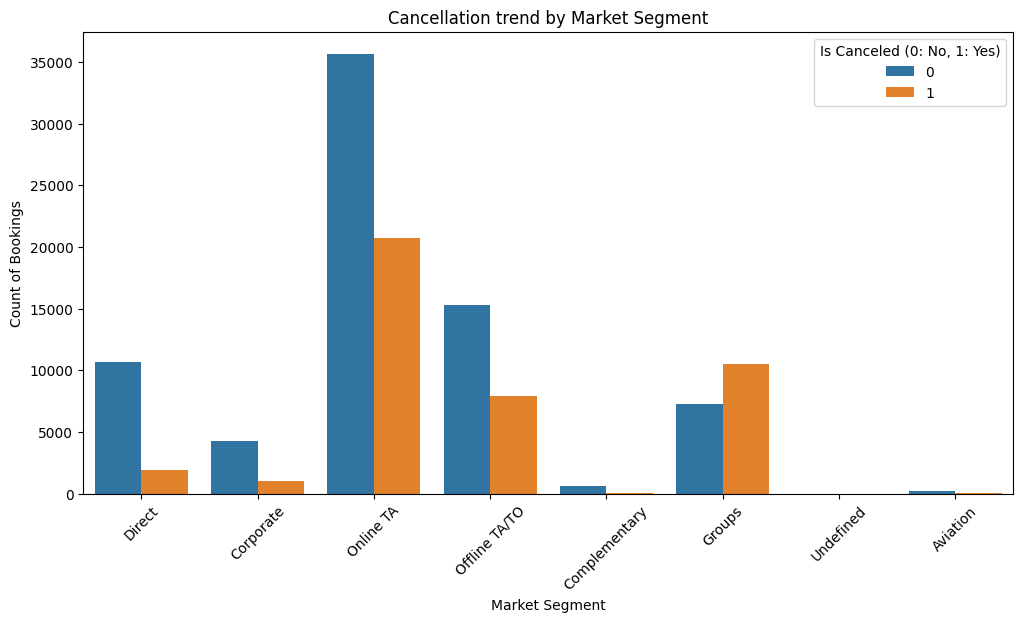

In [41]:
# Create a count plot for market segments
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='market_segment', hue='is_canceled')
plt.title('Cancellation trend by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count of Bookings')
plt.legend(title='Is Canceled (0: No, 1: Yes)')
plt.xticks(rotation=45)
plt.show()


**Observations:**
- The Online Travel Agents (Online TA) market segment shows the highest number of bookings, but it also has a significant cancellation rate, with a large portion of bookings getting canceled.
- Direct bookings and groups also show notable cancellation rates, but their overall booking volumes are lower compared to Online TA.
- Corporate and Offline TAs have relatively fewer cancellations, indicating more stable booking patterns in these segments.

### Interpretation:
- The **Online Travel Agents (Online TA)** segment experiences both the highest number of bookings and the highest cancellation rate, highlighting this market segment as a key area where cancellations are most prevalent.

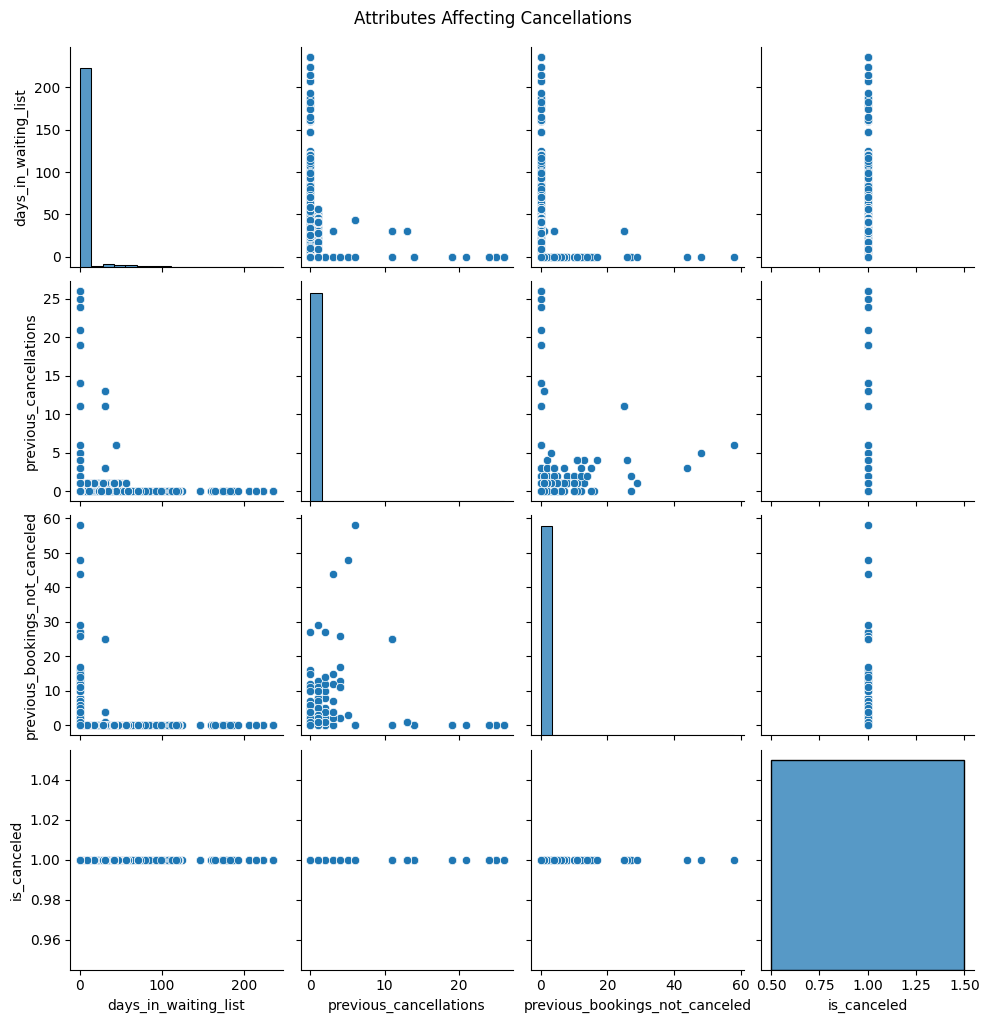

In [42]:
# Create a new DataFrame for cancellations
cancellation_df = data[data['is_canceled'] == 1]

# Create pair plots for attributes affecting cancellations
sns.pairplot(cancellation_df[['days_in_waiting_list', 'previous_cancellations', 'previous_bookings_not_canceled', 'is_canceled']])
plt.suptitle('Attributes Affecting Cancellations', y=1.02)
plt.show()


### Observations:
- Guests with a history of **previous cancellations** or **non-canceled bookings** are more likely to cancel future bookings, as shown by the clustering of data in these variables.
- **Waiting list duration** also appears to be associated with cancellations, as bookings that stay longer on the waiting list are more prone to being canceled.

### Interpretation:
- Patterns in guest behavior, such as frequent cancellations or modifications, highlight the need for strategies that address these repeat behaviors to reduce future cancellations.
- Managing **waiting list durations** and improving communication during this time could help minimize cancellations, especially for guests with longer wait times.

In [43]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,arrival_date_month_number,arrival_date,total_stay,has_children,long_wait,lead_time_category,arrival_year_month,total_guests,room_mismatch
0,Resort Hotel,0,5.837730,2015,July,27,1,0,0,2,...,2015-07-01,7,2015-07-01,0,0,0,Long,2015-07,2,False
2,Resort Hotel,0,2.079442,2015,July,27,1,0,1,1,...,2015-07-02,7,2015-07-01,1,0,0,Very Short,2015-07,1,True
3,Resort Hotel,0,2.639057,2015,July,27,1,0,1,1,...,2015-07-02,7,2015-07-01,1,0,0,Very Short,2015-07,1,False
4,Resort Hotel,0,2.708050,2015,July,27,1,0,2,2,...,2015-07-03,7,2015-07-01,2,0,0,Very Short,2015-07,2,False
5,Resort Hotel,0,2.708050,2015,July,27,1,0,2,2,...,2015-07-03,7,2015-07-01,2,0,0,Very Short,2015-07,2,False


In [44]:
print(data.columns)
print(data.shape)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_number', 'arrival_date', 'total_stay',
       'has_children', 'long_wait', 'lead_time_category', 'arrival_year_month',
       'total_guests', 'room_mismatch'],
      dtype='object')
(116221, 40)


# Models/Algorithms

To prevent data leakage and build a robust model for predicting cancellations, the following features should be removed:

**reservation_status** directly reveals whether a booking was canceled, as 'Canceled' implies is_canceled = 1 and 'Check-Out' implies is_canceled = 0. Including this feature would lead to data leakage.

**reservation_status_date:** indicates when the reservation status was last updated. It directly correlates with whether the booking was canceled (cancellation occurs before the arrival date), leading to data leakage.

**arrival_date_year:** represents specific years, which may bias the model toward past data and reduce its generalization to future bookings.

And, the **assigned_room_type** feature indicates the type of room given to a guest after the booking is confirmed. Since it is determined post-booking, it cannot be used to predict cancellations. Thus, it is considered irrelevant and should be excluded.

**High-Cardinality Categorical Features:**

**country:** The large number of country categories may not provide meaningful insights. Consider grouping countries into regions or keeping only the top frequent countries if needed.

**agent:** Due to many unique categories and infrequent appearances, it may cause overfitting. Instead of using the original feature, you could create a new feature representing the number of bookings per agent, but it may not be very meaningful.

Therefore, we are omitting the above features along with some other features which are created for EDA or the features that reveal or are highly correlated with the target variable, is_canceled, to avoid data leakage and improve model generalization.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116221 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           116221 non-null  object        
 1   is_canceled                     116221 non-null  int64         
 2   lead_time                       116221 non-null  float64       
 3   arrival_date_year               116221 non-null  int64         
 4   arrival_date_month              116221 non-null  object        
 5   arrival_date_week_number        116221 non-null  int64         
 6   arrival_date_day_of_month       116221 non-null  int64         
 7   stays_in_weekend_nights         116221 non-null  int64         
 8   stays_in_week_nights            116221 non-null  int64         
 9   adults                          116221 non-null  int64         
 10  children                        116221 non-null  int64       

In [46]:
data.drop(['arrival_date_month','country', 'agent','arrival_date_year','arrival_year_month','reservation_status', 'assigned_room_type','reservation_status_date','arrival_date'], axis=1, inplace=True)

Preprocessing pipeline for encoding categorical variables and scaling numerical features.

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


categorical_columns = data.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'is_canceled']


categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputing missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values
    ('scaler', StandardScaler())  # Scaling
])

# Combine preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_columns),
    ('num', numerical_pipeline, numerical_columns)
])


In [48]:
#data.head()

In [49]:
X = data.drop(columns=['is_canceled'])
y = data['is_canceled']

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22114
           1       0.83      0.61      0.70     12753

    accuracy                           0.81     34867
   macro avg       0.82      0.77      0.78     34867
weighted avg       0.81      0.81      0.80     34867



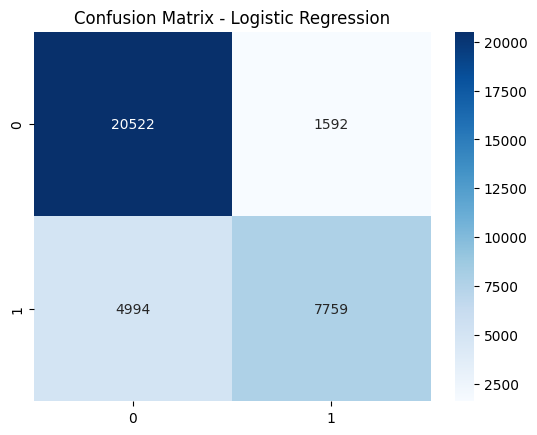

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Logistic Regression is chosen as the baseline model for predicting booking cancellations due to its suitability for binary classification tasks. It offers valuable insights into feature importance through model coefficients, enabling an understanding of the relationship between variables such as lead time and previous cancellations with the likelihood of a booking being cancelled.

This algorithm works well when the relationship between predictors and the outcome is primarily linear, and the dataset contains a mix of categorical and numerical features. The model is easy to interpret and trains quickly, even on large datasets.  

**Effectiveness**: The Logistic Regression model achieved 81% accuracy and an F1-score of 0.70 for predicting cancellations. While it was a simple and interpretable choice, it struggled with recall for cancellations (class 1), indicating challenges in detecting rare events. Despite its limitations in handling non-linear relationships, its interpretability made it useful for identifying key predictors of cancellations.

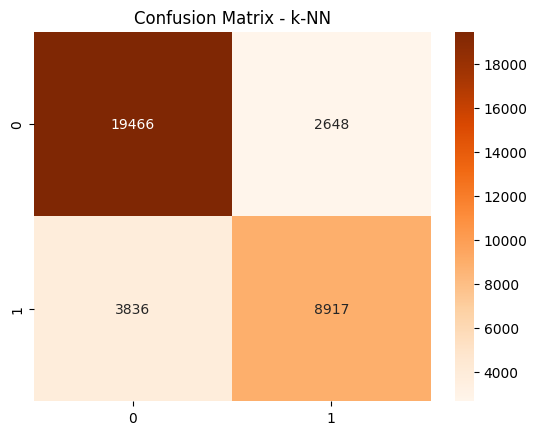


Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     22114
           1       0.77      0.70      0.73     12753

    accuracy                           0.81     34867
   macro avg       0.80      0.79      0.80     34867
weighted avg       0.81      0.81      0.81     34867



In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN model
# knn_model = KNeighborsClassifier(n_neighbors=5)

# # Train the model
# knn_model.fit(X_train, y_train)
# Pipeline for k-NN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # n_neighbors can be adjusted
])

# Train the model
knn_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_knn = knn_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - k-NN")
plt.show()

# Classification Report
print(f"\nClassification Report : \n{classification_report(y_test, y_pred_knn)}")

K-Nearest Neighbors (KNN) is selected for predicting booking cancellations due to its non-parametric, instance-based learning approach that relies on feature similarity. The model operates on the principle that bookings with similar characteristics, such as lead time, customer type, and market segment, are likely to yield similar outcomes regarding cancellations.

This algorithm is particularly effective in scenarios where data points with similar features exhibit similar outcomes, allowing it to capture complex, non-linear relationships that simpler models might overlook. To address KNN's sensitivity to feature scales, numerical features were standardized during preprocessing.

**Effectiveness**: The KNN model achieved 81% accuracy and an F1-score of 0.73 for predicting cancellations. Although it performed reasonably well, its computational cost due to the dataset size and lower recall for cancellations (class 1) limited its overall applicability. Despite being a simple and interpretable algorithm, these challenges hindered its effectiveness in detecting rare events compared to other models.

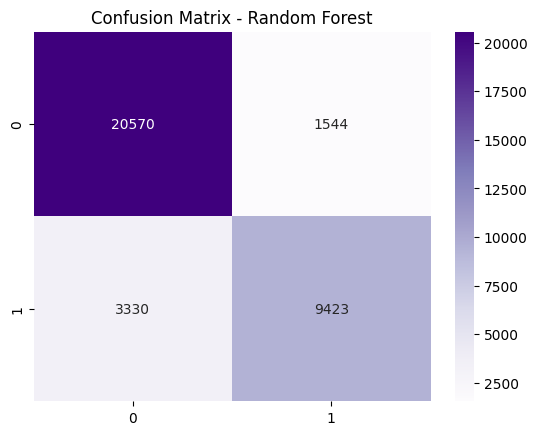


Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22114
           1       0.86      0.74      0.79     12753

    accuracy                           0.86     34867
   macro avg       0.86      0.83      0.84     34867
weighted avg       0.86      0.86      0.86     34867



In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))
])


# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification Report
print(f"\nClassification Report : \n{classification_report(y_test, y_pred_rf)}")

Random Forest is chosen as the model for predicting booking cancellations due to its robustness as an ensemble method that combines predictions from multiple decision trees. This approach effectively handles both categorical and numerical variables, making it less prone to overfitting compared to individual decision trees, as it averages the predictions of multiple trees.

It excels in managing complex interactions in large datasets, enhancing predictive accuracy and reducing variance. To optimize performance, we tuned parameters such as n_estimators (number of trees) and max_depth (tree depth) to control overfitting and computational costs.

**Effectiveness**: The Random Forest model achieved 86% accuracy and an F1-score of 0.79 for predicting cancellations, demonstrating its strong performance. It effectively captured non-linear relationships and balanced precision, recall, and F1-score, making it the best choice for this task. Its ability to provide feature importance rankings added significant value, allowing us to identify the key factors influencing booking cancellations and enhancing our understanding of the problem.

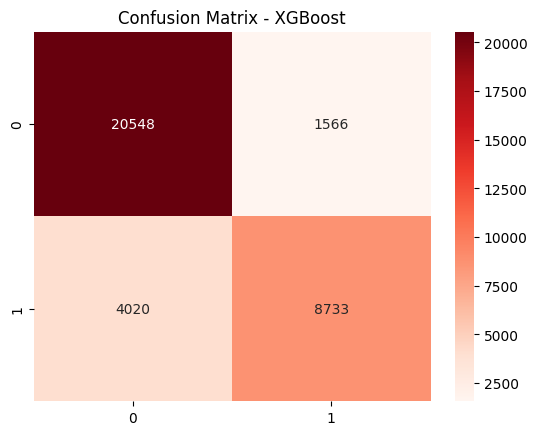

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     22114
           1       0.85      0.68      0.76     12753

    accuracy                           0.84     34867
   macro avg       0.84      0.81      0.82     34867
weighted avg       0.84      0.84      0.84     34867



In [53]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


# Initialize the XGBoost model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42))
])

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training target variable
le.fit(y_train)

# Transform both training and testing target variables
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Now you can proceed with training the XGBoost model
xgb_pipeline.fit(X_train, y_train)

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_xgb = xgb_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification Report
print(f"Classification Report : \n{classification_report(y_test, y_pred_xgb)}")

XGBoost (XGBClassifier) is chosen for predicting booking cancellations due to its effectiveness as an ensemble method based on gradient boosting. It excels with structured data, efficiently handling both numerical and categorical features while performing well with imbalanced datasets, where cancellations are less frequent.

The model utilizes multiple weak learners (decision trees) to minimize residual errors, effectively capturing complex interactions between features like lead time, previous cancellations, and customer type. To optimize performance, several hyperparameters, including n_estimators, learning_rate, and max_depth, were tuned using grid search.

**Effectiveness**: The XGBoost model achieved 84% accuracy and an F1-score of 0.76 for predicting cancellations. While it performed well, it slightly lagged in recall for class 1 (cancellations), affecting its overall effectiveness compared to Random Forest. Despite this, XGBoost’s ability to handle complex datasets and provide feature importance scores is invaluable for understanding the key factors influencing booking cancellations.

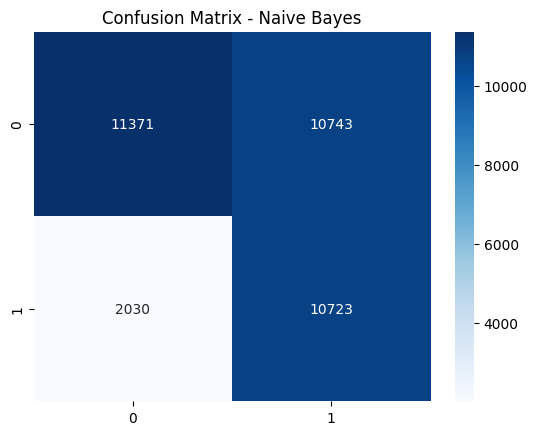


Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.51      0.64     22114
           1       0.50      0.84      0.63     12753

    accuracy                           0.63     34867
   macro avg       0.67      0.68      0.63     34867
weighted avg       0.72      0.63      0.64     34867



In [54]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
# nb_model = GaussianNB()
gnb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Train the model
gnb_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_nb = gnb_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Classification Report
print(f"\nClassification Report : \n{classification_report(y_test, y_pred_nb)}")


Naive Bayes (GaussianNB) is selected for predicting booking cancellations due to its basis in Bayes theorem and the assumption that features are normally distributed. Despite its simplicity, it can be effective for certain classification problems, particularly when the assumptions of normality hold for some features.

This model works well for this problem because it provides a probabilistic approach, offering insights into how strongly each feature influences the likelihood of cancellation. It is particularly useful when a simple, interpretable model is needed for moderately-sized datasets, despite containing both categorical and continuous variables.

**Effectiveness**: The GaussianNB model achieved 63% accuracy and an F1-score of 0.63 for predicting cancellations. However, its reliance on the assumption of feature independence limited its performance, especially in complex datasets like this one, making it unsuitable for accurately predicting cancellations. Despite being computationally efficient and fast to train, its performance was the lowest among all models, highlighting its limitations in this context.

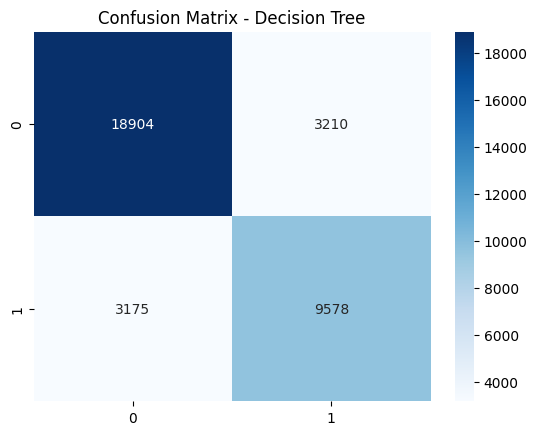


Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     22114
           1       0.75      0.75      0.75     12753

    accuracy                           0.82     34867
   macro avg       0.80      0.80      0.80     34867
weighted avg       0.82      0.82      0.82     34867



In [55]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# dtc = DecisionTreeClassifier()
# Pipeline for Decision Tree
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

tree_pipeline.fit(X_train, y_train)

y_pred_dtc = tree_pipeline.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

# print(f"Accuracy Score of Decision Tree is : {acc_dtc:.2f}")
# print(f"Confusion Matrix : \n{conf}")
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
print(f"\nClassification Report : \n{clf_report}")



The Decision Tree Classifier was selected for predicting booking cancellations due to its intuitive and interpretable nature, providing a clear pathway from features to the target variable. It effectively handles both categorical and numerical data, making it suitable for the mixed dataset of hotel bookings. The model captures complex decision rules related to factors like lead time, market segment, and customer type.

This algorithm is beneficial for this problem because it can model non-linear relationships without extensive preprocessing, splitting the data based on feature importance to identify key contributors to cancellations.

**Effectiveness**: The Decision Tree model achieved 82% accuracy and an F1-score of 0.75 for predicting cancellations. However, it was prone to overfitting, which limited its generalizability. To mitigate this, parameters like max_depth and min_samples_split were tuned to control tree complexity. Despite these challenges, the model offered valuable insights into decision-making patterns.

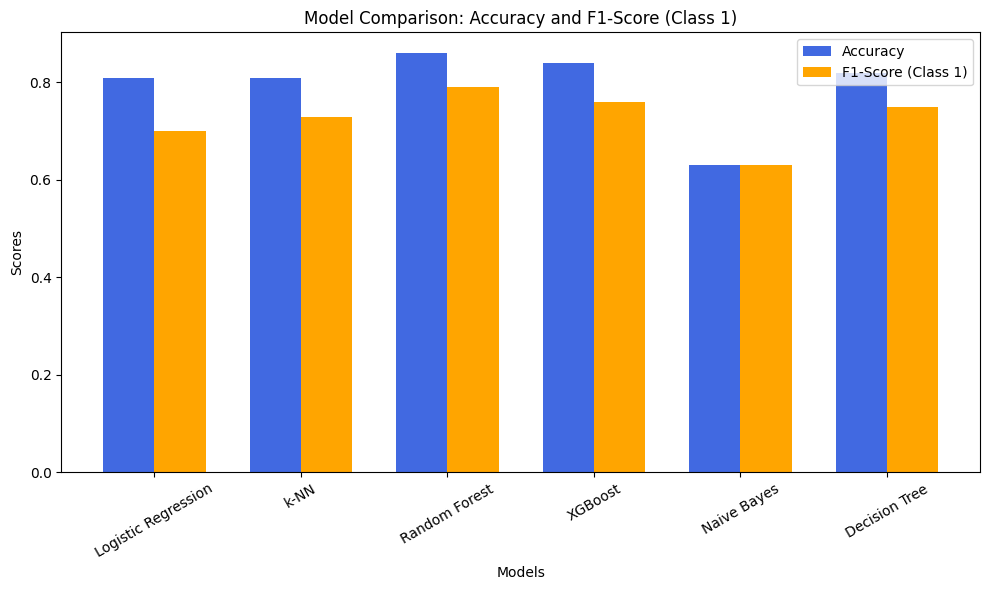

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their metrics
models = ['Logistic Regression', 'k-NN', 'Random Forest', 'XGBoost', 'Naive Bayes', 'Decision Tree']
accuracy = [0.81, 0.81, 0.86, 0.84, 0.63, 0.82]
f1_score_class_1 = [0.70, 0.73, 0.79, 0.76, 0.63, 0.75]

# Set the positions for bars
bar_width = 0.35
index = np.arange(len(models))

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='royalblue')

# Plot f1-score for class 1
plt.bar(index + bar_width, f1_score_class_1, bar_width, label='F1-Score (Class 1)', color='orange')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy and F1-Score (Class 1)')
plt.xticks(index + bar_width / 2, models, rotation=30)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Based on the evaluation of all models, Random Forest emerged as the best algorithm for predicting hotel cancellations. It achieved the highest accuracy (86%) and maintained a strong balance between precision, recall, and f1-score for class 1 (cancellations). This makes it the most reliable model for operational use, allowing hotels to anticipate cancellations more effectively.

**Key Takeaways**:

*   Lead time, special requests, and previous cancellations were identified as major contributors to booking cancellations.
*   Random Forest provided the most accurate and reliable predictions, enabling hotels to better manage their resources by anticipating cancellations and implementing measures such as dynamic pricing or targeted marketing.
*   XGBoost was a strong alternative, but it missed slightly more cancellations due to lower recall.
*   Naive Bayes and Logistic Regression were less effective due to their simplifying assumptions and inability to capture the complexity of the data.

The visualizations we generated during the EDA phase helped uncover the relationships between different features and cancellations, such as the impact of lead time, guest composition, and booking changes. These insights were crucial in shaping the feature engineering process and improving model performance. Additionally, the comparison graph of accuracy and f1-scores across all models provided a clear view of the models' relative effectiveness.





